In [29]:
import pandas as pd
lcn = pd.read_csv("E:\DATA scientist\R\Lungcap\LungCapData.csv") # read the dataset from the local directory
lcn.head(5) #display first 5 records of the dataset.

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [30]:
lcn.isnull().sum() #check if the dataset has null values

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [31]:
lcn.Gender = lcn.Gender.replace({"male": 1 , "female": 0 }) # convert categorical data into numeric data. 
lcn.Caesarean = lcn.Caesarean.replace({"no": 1 , "yes": 0 }) # convert categorical data into numeric data. 
lcn.Smoke = lcn.Smoke.replace({"yes": 1 , "no": 0 }) # convert categorical data into numeric data. 

In [32]:
lcn.head(5) #display first 5 records of the dataset.

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,1
1,10.125,18,74.7,1,0,1
2,9.550,16,69.7,0,0,0
3,11.125,14,71.0,0,1,1
4,4.800,5,56.9,0,1,1


In [33]:
from sklearn.model_selection import train_test_split #import test_train_split library
lcn_train , lcn_test = train_test_split(lcn, test_size = 0.2) # dataset is split in 8:2 ratio (80% train data and 20% test data)

In [34]:
lcn_x_train = lcn_train.iloc[:,[1,2,3,4]] 
lcn_y_train = lcn_train.iloc[:,0] # separate target column in train dataset

In [35]:
lcn_x_test = lcn_test.iloc[:,[1,2,3,4]]
lcn_y_test = lcn_test.iloc[:,0] # separate target column in train dataset

In [36]:
from sklearn.linear_model import LinearRegression # import linear regression algorithm 
reg = LinearRegression()
reg.fit(lcn_x_train, lcn_y_train) # implement the algorithm on train dataset

LinearRegression()

In [37]:
pred_value =  reg.predict(lcn_x_test) # predict the output of test dataset and save the output in "pred_value" variable

In [38]:
reg.coef_  #Regression coefficient determines the importance of the dependent variables to predict / calculate the dependant variable

array([ 0.16625483,  0.26182882, -0.6137054 ,  0.32808081])

### This array represents the Regression coefficient of 4 dependant variable, which are "Age", "Height","Smoke","Gender" respectivey. 

## R Square method is the statistical measure of how close the data are to the best fitted regression line.
### It is also known as coefficient of determination or coefficient of multiple determination

In [39]:
Rsqr = reg.score(lcn_x_train,lcn_y_train)
Rsqr

0.8543732746308363

### It is generally considered that a high R squared model is a good model. 

#### The general formula to calculate the R square method is 
##### (distance between actual data points and mean) devided by (distance between predicted data points and mean)

#### R square increases with the increase in the number of independent variables, even though the independant variable are useless. Hence we calculate the adjusted R square

In [41]:
pred_train = reg.predict(lcn_x_train)
error_train = pred_train - lcn_y_train
N = lcn_x_train.shape[0]
K = lcn_x_train.shape[1]
Adj_Rsqr = 1 - (1-Rsqr)*(N-1)/(N-K-1)
Adj_Rsqr

0.8533602191500074

In [43]:
error = pred_value - lcn_y_test
import numpy as np
MSE =np.mean(np.square(error)) #mean square error is the measure of mean of squares of the errors between actual and the predicted values.
MAE = np.mean(np.abs(error)) #mean absolute error is the measure of mean of absolute errors
MAPE = np.mean(np.abs(error * 100/ lcn_y_test)) 
Acc = 100 - MAPE

In [44]:
print(" MSE is ", MSE,
      "MAE is ", MAE, "MAPE is", MAPE, "Accuracy is ", Acc )

 MSE is  1.0449717801723408 MAE is  0.8163696544022698 MAPE is 13.217527848585853 Accuracy is  86.78247215141414


In [45]:
RMSE = np.sqrt(MSE)
RMSE

1.0222386121509697

## Assumptions: mean of the error terms (train ) should be 0 

In [47]:
pred_train = reg.predict(lcn_x_train)
error_train = pred_train - lcn_y_train

In [48]:
np.mean(error_train)

-3.3283720607210726e-15

In [49]:
import matplotlib.pyplot as plt

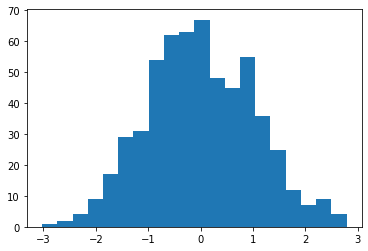

In [50]:
plt.hist(error_train, bins = 20);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


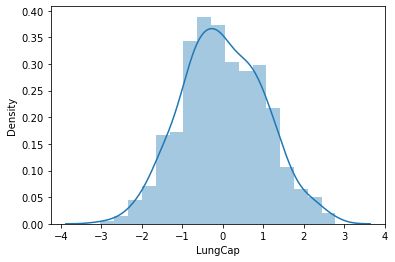

In [51]:
import seaborn as sns
sns.distplot(error_train);

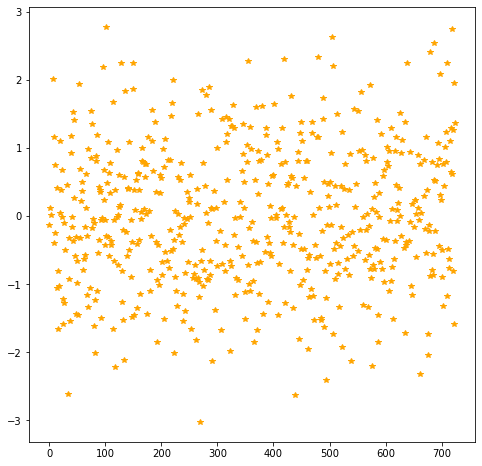

In [52]:
plt.figure(figsize =(8,8))
plt.plot(error_train, "*", color = "orange");

In [53]:
pred_actual = pd.DataFrame({"Predicted" :pred_train  , "Actual" :lcn_y_train})
pred_actual

,Predicted,Actual
223,6.983101,9.000
659,3.196600,3.250
575,10.856318,13.050
574,9.114362,10.025
213,8.633913,9.400
...,...,...
418,9.709798,9.875
492,2.075165,2.875
70,7.158514,8.500
405,8.746512,8.775


<Figure size 1440x1440 with 0 Axes>

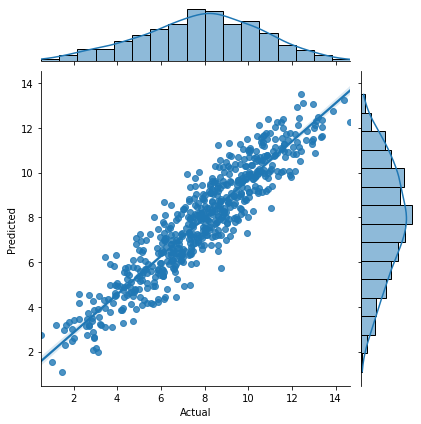

In [54]:
plt.figure(figsize= (20,20))
sns.jointplot(x  = 'Actual' , y= 'Predicted' , kind = "reg", data = pred_actual);
